In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# 20000000 fputs with and without fsync.. F.S 1 GB
# File Size created 268Mb
wo_fsync="/users/karant/wiscsee-master/workloads/subexp-8836665317721674962-ext4-02-14-12-37-15-5481327146053677460/"
with_fsync="/users/karant/wiscsee-master/workloads/subexp-8836665317721674962-ext4-02-14-12-40-09--7414402652311058883/"

# 1000000 fputs with and without fsync.. F.S 1 GB
# File size created 14Mb
wo_fsync="/tmp/results/c-write-test/subexp--5736089287470461742-f2fs-02-22-13-47-08--1630716789749059933"
with_fsync="/tmp/results/c-write-test/subexp--5736089287470461742-f2fs-02-22-14-05-08--2003101513681438084"
wo_fsync_locality = wo_fsync + "_locality"
with_fsync_locality = with_fsync + "_locality"

In [36]:
highNCQ = pd.read_table(wo_fsync + "/ncq_depth_timeline.txt", sep=";")
lowNCQ = pd.read_table(with_fsync + "/ncq_depth_timeline.txt", sep=";")

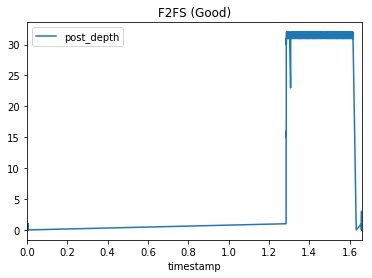

In [37]:
highNCQ.plot(x='timestamp', y='post_depth', title="F2FS (Good)")
plt.show()

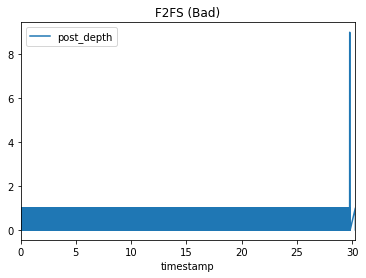

In [38]:
lowNCQ.plot(x='timestamp', y='post_depth', title = "F2FS (Bad)")
plt.show()

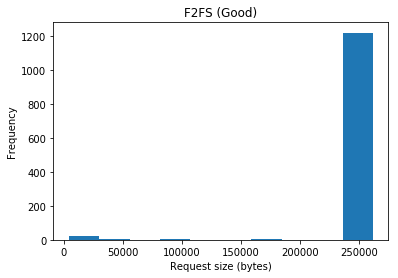

In [39]:
p = highNCQ['size'].plot.hist()
p.set_xlabel("Request size (bytes)")
p.set_title("F2FS (Good)")
plt.show()

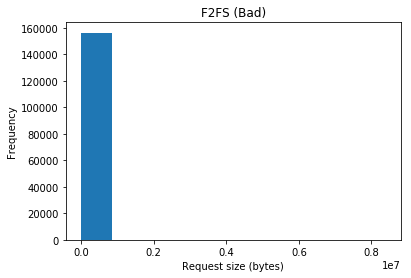

In [40]:
p = lowNCQ['size'].plot.hist()
p.set_xlabel("Request size (bytes)")
p.set_title("F2FS (Bad)")
plt.show()

In [16]:
highLocal = pd.read_table(with_fsync + "/lpn.count", sep=" ")
lowLocal = pd.read_table(wo_fsync + "/lpn.count", sep=" ")

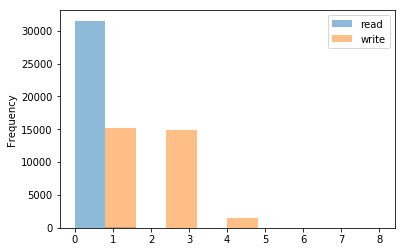

In [17]:
highLocal[["read","write"]].plot.hist(alpha = 0.5)
plt.show()

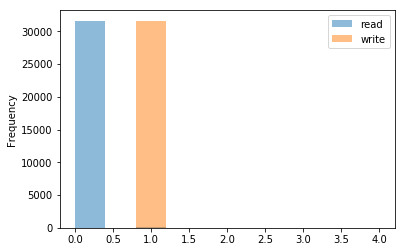

In [18]:
lowLocal[["read","write"]].plot.hist(alpha = 0.5)
plt.show()

In [77]:
highLocalSem = pd.read_table(with_fsync + "/lpn_sem.out", sep=";")
highLocal = highLocal.join(highLocalSem, on="lpn", lsuffix='_count', rsuffix='_desc')
lowLocalSem = pd.read_table(wo_fsync + "/lpn_sem.out", sep=";")
lowLocal = lowLocal.join(lowLocalSem, on="lpn", lsuffix='_count', rsuffix='_desc')

In [25]:
import os
import json
from pprint import pprint

def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

In [31]:
TCacheWithFsync = find_all("recorder.json", with_fsync_locality)

for f in TCacheWithFsync:
    data = json.load(open(f))
    print data['general_accumulator']['Mapping_Cache']


{u'hit': 41113, u'miss': 15}
{u'hit': 41113, u'miss': 15}
{u'hit': 41113, u'miss': 15}


In [32]:
TCacheWithFsync = find_all("recorder.json", wo_fsync_locality)

for f in TCacheWithFsync:
    data = json.load(open(f))
    print data['general_accumulator']['Mapping_Cache']


{u'hit': 6921, u'miss': 13}
{u'hit': 6921, u'miss': 13}
{u'hit': 6921, u'miss': 13}


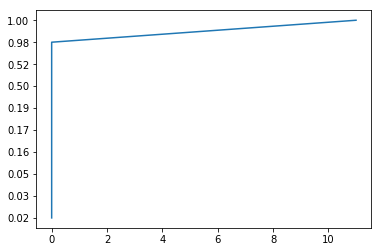

In [74]:
f = "/tmp/results/c-write-test-grouping/subexp--4336838407307807528-ext4-02-19-11-28-10--4477617615466440057/recorder.json"
data = json.load(open(f))
points = data['ftl_func_valid_ratios'][5]
n_pages_per_block = 64
for k, v in points.iteritems():
    points[k] = v/n_pages_per_block

lists = sorted(points.items()) # sorted by key, return a list of tuples

y, x = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()


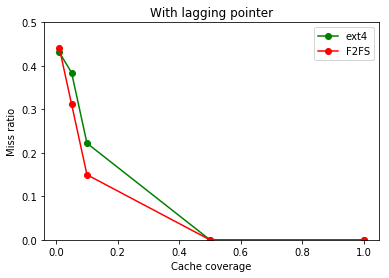

In [62]:
y = [0.4310207337,0.3843700159,0.2220893142,0,0]
x = [0.009999999776,0.04999999981,0.09999999963,0.5,1]
plt.plot(x, y, '-go', label = "ext4")
y = [0.4414634146,0.3117886179,0.1495934959,0,0]
plt.plot(x, y, '-ro', label = "F2FS")
plt.xlabel("Cache coverage")
plt.ylabel("Miss ratio")
plt.title("With lagging pointer")
plt.ylim([0.00, 0.5])
plt.legend()
plt.show()

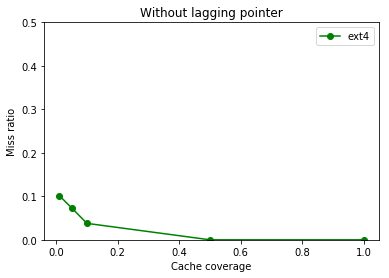

In [63]:
x = [0.009999999776,0.04999999981,0.09999999963,0.5,1]
y = [0.1016483516,0.07348901099,0.03777472527,0,0]
plt.plot(x, y, '-go', label = "ext4")
plt.xlabel("Cache coverage")
plt.ylabel("Miss ratio")
plt.title("Without lagging pointer")
plt.ylim([0.00, 0.5])
plt.legend()
plt.show()

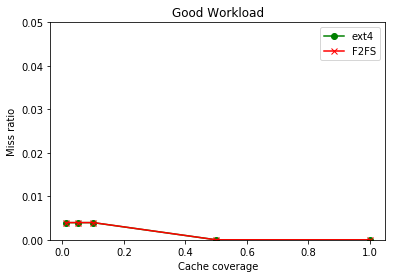

In [74]:
y = [0.00395186375,0.00395186375,0.00395186375,0,0]
plt.plot(x, y, '-go', label = "ext4")
y = [0.003956302006,0.003956302006,0.003956302006,0,0]
plt.plot(x, y, '-rx', label = "F2FS")
plt.xlabel("Cache coverage")
plt.ylabel("Miss ratio")
plt.title("Good Workload")
plt.ylim([0.0, 0.05])
plt.legend()
plt.show()

In [136]:
accumulator = "/tmp/results/old/c-read-test-locality/subexp--4229451246104269508-ext4-02-23-11-23-17-2878328392281396007/accumulator_table.txt"
accum = pd.read_table(accumulator, sep=";",dtype=str)

In [139]:
accum

,count,counter.set.name,counter.name
0,200000,channel_busy_time,channel_5-write-background
1,60000,channel_busy_time,channel_7-read-background
2,1320000,channel_busy_time,channel_5-read-foreground
3,200000,channel_busy_time,channel_10-write-foreground
4,200000,channel_busy_time,channel_8-write-foreground
5,1120000,channel_busy_time,channel_8-read-foreground
6,80000,channel_busy_time,channel_5-read-background
7,1140000,channel_busy_time,channel_0-read-foreground
8,1240000,channel_busy_time,channel_2-read-foreground
9,200000,channel_busy_time,channel_13-write-foreground
